## Step 1: Import the required libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import missingno as msno  # Optional: for visualizing missing data

# Identify outliers using Z-score
from scipy import stats

## Step 2: Load the dataset


In [11]:
# Load your dataset into a pandas DataFrame
df = pd.read_csv('resultados_11700_108.csv')  # Replace 'your_dataset.csv' with your actual file path

# Display the first few rows of the dataset
df = df.head(20000)

df = df.drop(columns=['Archivo'])
df

,Inicio,Medio,Final,Diferencia
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
19995,NaN,NaN,NaN,NaN
19996,NaN,NaN,NaN,NaN
19997,NaN,NaN,NaN,NaN
19998,NaN,NaN,NaN,NaN


## Step 3: Handle missing values


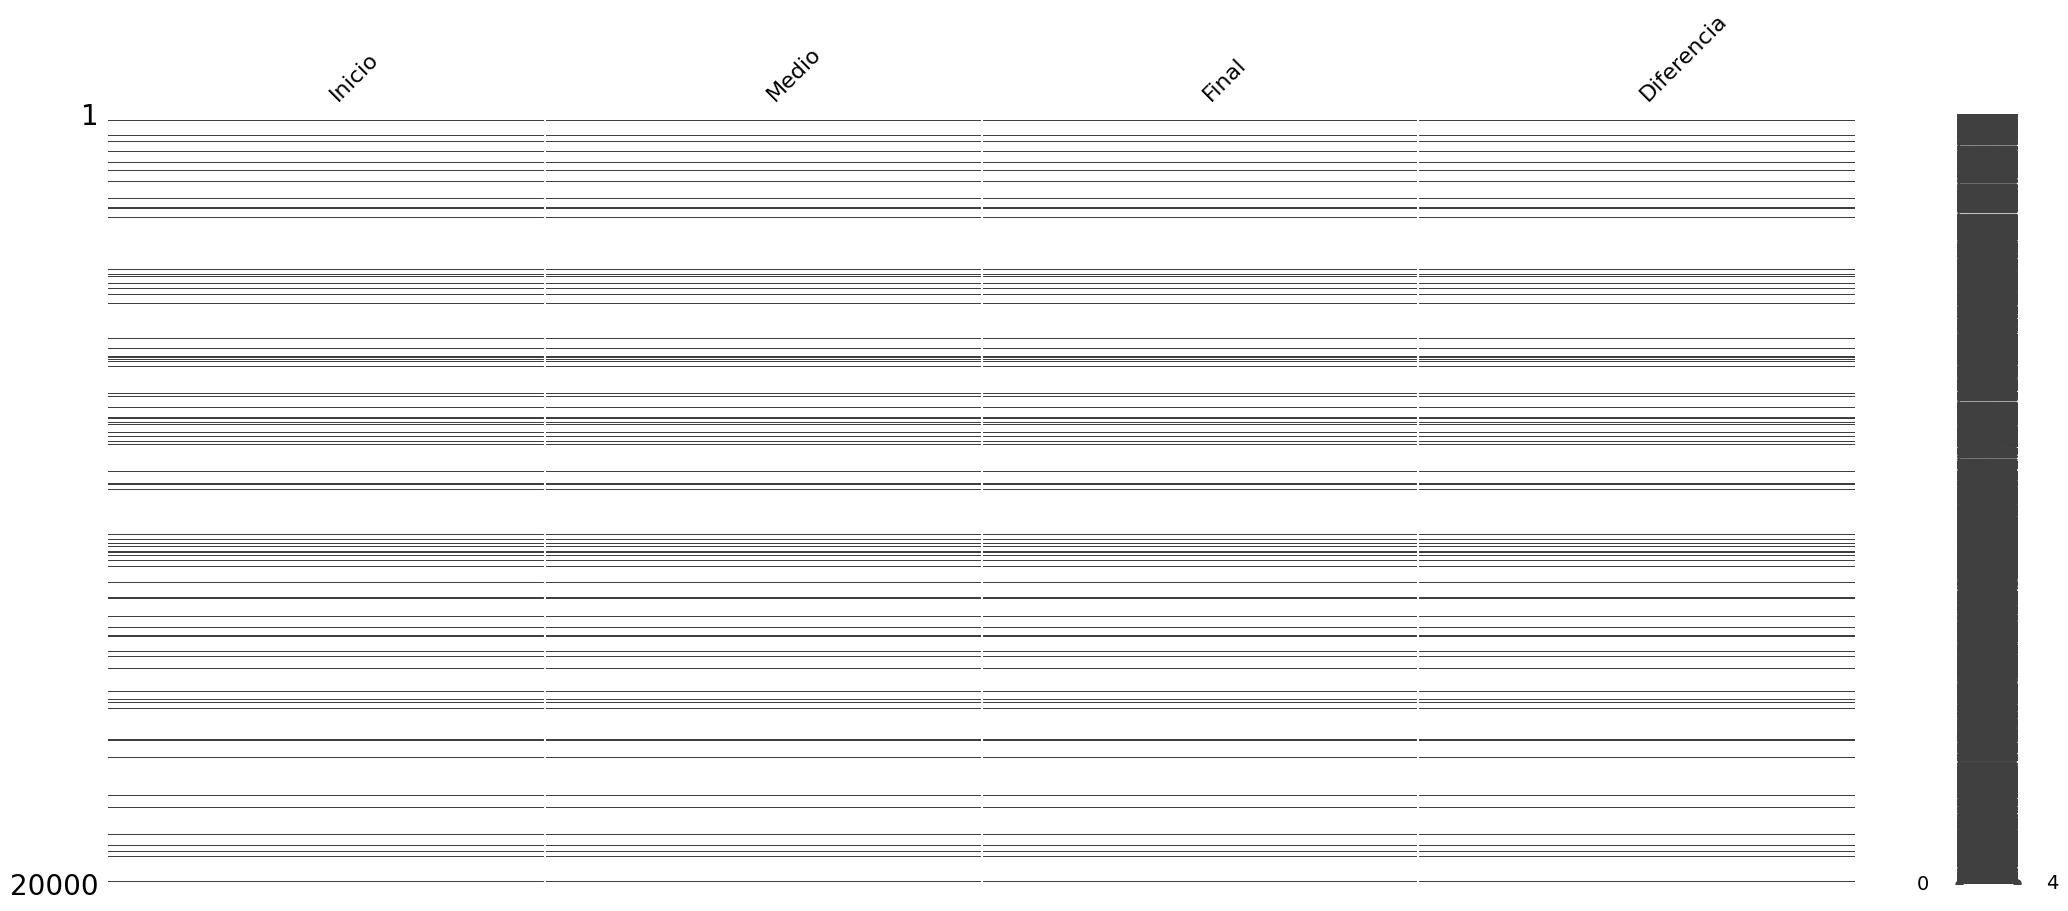

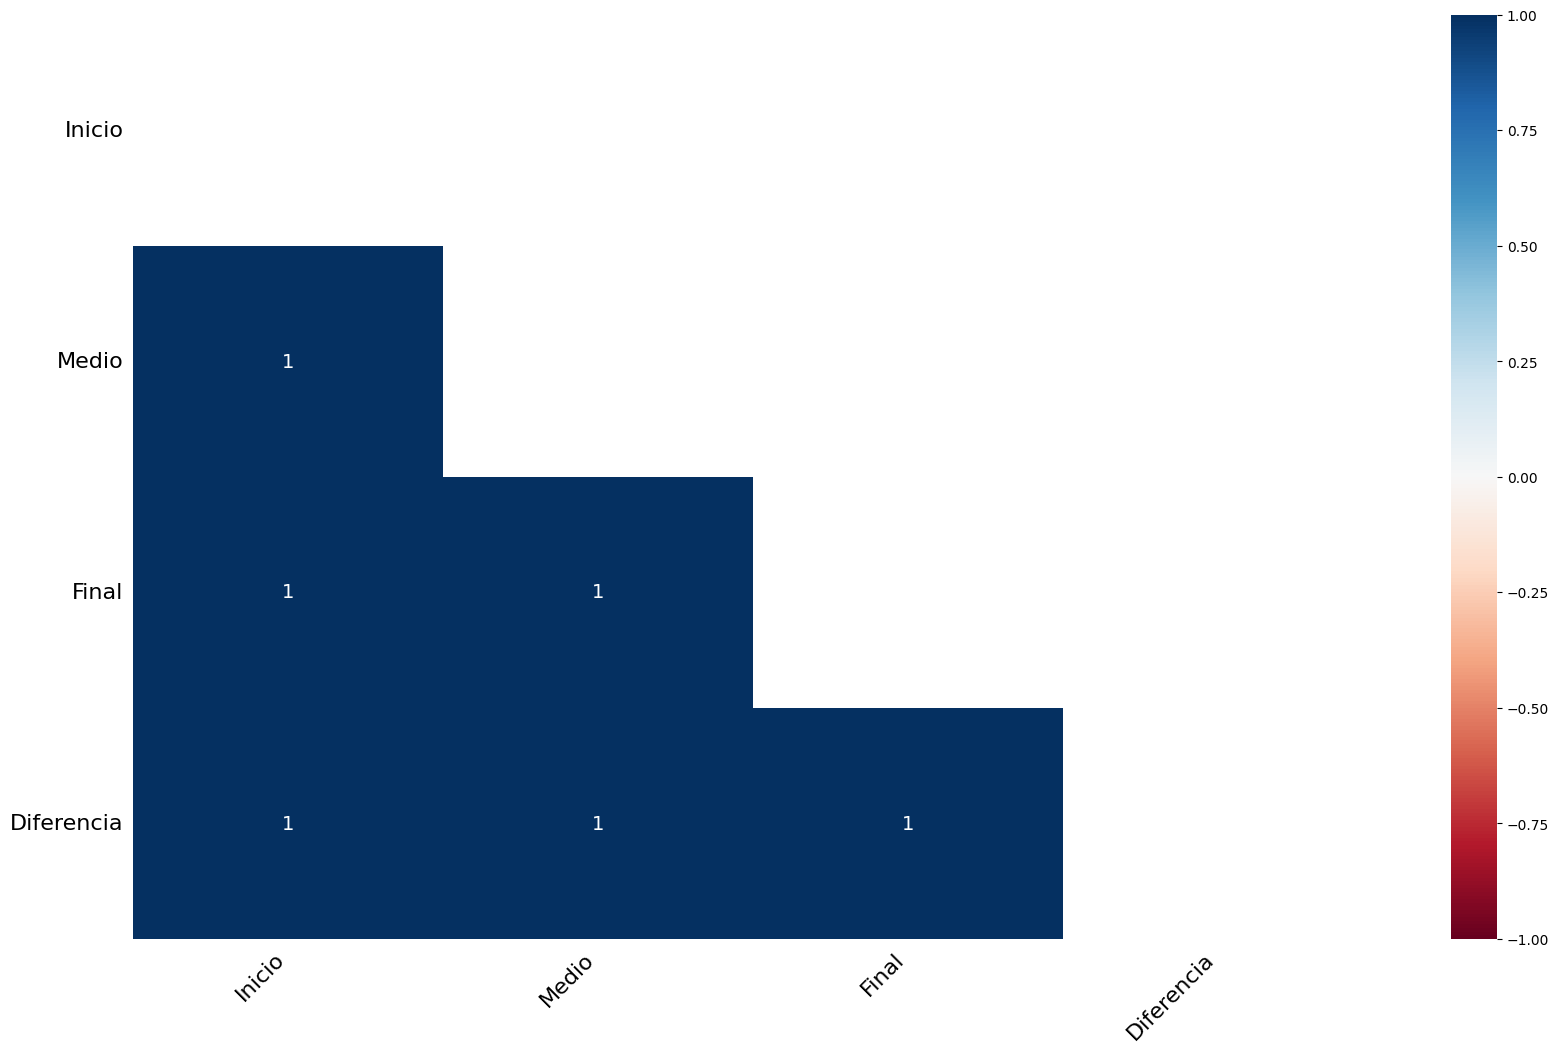

In [12]:
# Visualize missing data (optional)
msno.matrix(df)
msno.heatmap(df)

# Drop rows with missing values
df_cleaned = df.dropna()

# Or, fill missing values with the mean
df_filled = df.fillna(df.mean())

## Step 4: Handle outliers


In [4]:
# Identify outliers using Z-score
from scipy import stats


Explanation: The Z-score method helps identify outliers by calculating how many standard deviations a data point is from the mean. You can remove these outliers or cap them to reduce their impact on your analysis.

In [ ]:
z_scores = np.abs(stats.zscore(df_cleaned))
z_scores

array([[0.73256099, 0.72408152, 0.72408422, 0.04337411],
       [0.76102116, 0.75438887, 0.7564181 , 0.66064839],
       [0.53912226, 0.53995192, 0.54034657, 0.14866677],
       ...,
       [1.12466124, 1.11229567, 1.11089406, 0.36128346],
       [0.9259856 , 0.9155463 , 0.91481347, 0.16924258],
       [1.50373619, 1.48747903, 1.48460777, 0.78994615]], shape=(1597, 4))

In [20]:
df_no_outliers = df_cleaned[(z_scores < 3).all(axis=1)]
df_no_outliers

,Inicio,Medio,Final,Diferencia
19,105097.0,105359.0,105621.0,524.0
24,106349.0,106701.0,107053.0,704.0
28,49154.0,49388.0,49622.0,468.0
45,98713.0,98982.0,99251.0,538.0
48,33849.0,33956.0,34063.0,214.0
...,...,...,...,...
19947,92606.0,92918.0,93231.0,625.0
19948,85192.0,85520.0,85848.0,656.0
19973,122346.0,122549.0,122752.0,406.0
19978,113606.0,113837.0,114068.0,462.0


In [21]:
# Or cap outliers at a threshold
upper_limit = df_cleaned['Inicio'].quantile(0.95)
df_cleaned['Inicio'] = np.where(df_cleaned['Inicio'] > upper_limit, upper_limit, df_cleaned['Inicio'])
df_cleaned

C:\Users\david\AppData\Local\Temp\ipykernel_26392\3078281647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Inicio'] = np.where(df_cleaned['Inicio'] > upper_limit, upper_limit, df_cleaned['Inicio'])


,Inicio,Medio,Final,Diferencia
19,105097.0,105359.0,105621.0,524.0
24,106349.0,106701.0,107053.0,704.0
28,49154.0,49388.0,49622.0,468.0
45,98713.0,98982.0,99251.0,538.0
48,33849.0,33956.0,34063.0,214.0
...,...,...,...,...
19947,92606.0,92918.0,93231.0,625.0
19948,85192.0,85520.0,85848.0,656.0
19973,122346.0,122549.0,122752.0,406.0
19978,113606.0,113837.0,114068.0,462.0


## Step 5: Scale and normalize data


In [23]:
# Min-Max Scaling
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)
print(df_scaled.head())
# Z-score Standardization
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)
print(df_standardized.head())

     Inicio     Medio     Final  Diferencia
0  0.734146  0.702527  0.703957    0.220903
1  0.742895  0.711481  0.713510    0.306413
2  0.343227  0.329085  0.330391    0.194299
3  0.689536  0.659979  0.661463    0.227553
4  0.236279  0.226122  0.226598    0.073634
     Inicio     Medio     Final  Diferencia
0  0.732688  0.724082  0.724084    0.043374
1  0.761150  0.754389  0.756418    0.660648
2 -0.539114 -0.539952 -0.540347   -0.148667
3  0.587554  0.580065  0.580253    0.091384
4 -0.887056 -0.888464 -0.891661   -1.019709


Explanation: Scaling ensures that all numerical features in your dataset are on the same scale, which is important for many machine learning algorithms. Min-Max Scaling scales data to a [0, 1] range, while Z-score Standardization scales data to have a mean of 0 and a standard deviation of 1.

## Step 6: Encode categorical variables


In [26]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df_scaled, columns=['Inicio'])
df_encoded

,Medio,Final,Diferencia,Inicio_0.0,Inicio_6.987807048154833e-06,Inicio_1.397561409630972e-05,Inicio_2.0963421144464607e-05,Inicio_2.795122819261944e-05,Inicio_3.493903524077433e-05,Inicio_4.1926842288929215e-05,...,Inicio_0.994239162425571,Inicio_0.9946095161991232,Inicio_0.9953572115532757,Inicio_0.9962306874342951,Inicio_0.9962796020836322,Inicio_0.9971670535787479,Inicio_0.9978029440201299,Inicio_0.9996197738526502,Inicio_0.9999971154332506,Inicio_1.0000000000000002
0,0.702527,0.703957,0.220903,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.711481,0.713510,0.306413,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.329085,0.330391,0.194299,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.659979,0.661463,0.227553,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.226122,0.226598,0.073634,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,0.619520,0.621304,0.268884,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1593,0.570160,0.572053,0.283610,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1594,0.817219,0.818237,0.164846,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1595,0.759092,0.760307,0.191449,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Explanation: One-hot encoding converts categorical variables into a format that can be provided to ML algorithms to do a better job in prediction.

## Step 7: Save the cleaned and preprocessed data


In [27]:
# Save the cleaned and preprocessed DataFrame to a new CSV file  
df_encoded.to_csv('cleaned_preprocessed_data.csv', index=False)

print('Data cleaning and preprocessing complete. File saved as cleaned_preprocessed_data.csv')

Data cleaning and preprocessing complete. File saved as cleaned_preprocessed_data.csv


Explanation: The cleaned and preprocessed data is saved to a new CSV file, making it ready for use in analysis or model training.

## Part 3. Automate the workflow


To streamline your data preprocessing workflow, consider wrapping these steps into functions or a reusable script. Here’s a basic structure:

In [7]:
def load_data(filepath):
    df = pd.read_csv(filepath)
    df = df.drop(columns=['Archivo'])
    df = df.head(20000)
    return df

def handle_missing_values(df):
    return df.fillna(df.mean())

def remove_outliers(df):
    z_scores = np.abs(stats.zscore(df))
    return df[(z_scores < 3).all(axis=1)]

def scale_data(df):
    scaler = StandardScaler()
    return pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

def encode_categorical(df, categorical_columns):
    return pd.get_dummies(df, columns=categorical_columns)

def save_data(df, output_filepath):
    df.to_csv(output_filepath, index=False)

# Example usage:
df = load_data('resultados_11700_108.csv')
df = handle_missing_values(df)
df = remove_outliers(df)
df = scale_data(df)
df = encode_categorical(df, ['Inicio'])
save_data(df, 'cleaned_preprocessed_data.csv')